<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/03_ml_libraries_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с табличными данными. Pandas

В этом ноутбуке мы познакомимся с основными фичами `pandas`. Эта библиотека огромна, поэтому мы сможем лишь немного поиграться с доступной функциональностью. Для детального ознакомления стоит почитать [документацию](https://pandas.pydata.org/docs/reference/index.html)

In [ ]:
!gdown 1jClCUpHZdezsw1q5JvMj_qEsAjhMgz1p

Downloading...
From: https://drive.google.com/uc?id=1jClCUpHZdezsw1q5JvMj_qEsAjhMgz1p
To: /content/coins.csv
100% 3.98M/3.98M [00:00<00:00, 131MB/s]


# Первое знакомство

Импортируем `pandas`:

In [ ]:
import pandas as pd  # Стандартный алиас для pandas

Читаем датасет из csv-файла:

In [ ]:
coins = pd.read_csv('/content/coins.csv')

In [ ]:
pd.read_csv?

Посмотрим что хранится в переменной:

In [ ]:
coins

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


Посмотрим на тип переменной:

In [ ]:
type(coins)

pandas.core.frame.DataFrame

Поясним значения, хранящиеся в колонках:
 - *date* - дата измерений
 - *name* - полное название монеты
 - *symbol* - сокращенное название монеты
 - *price* - средняя цена монеты за торговый день в USD
 - *txCount* - количество транзакций в сети данной монеты
 - *txVolume* - объем монет переведенных между адресами в сети данной монеты
 - *activeAddresses* - количество адресов совершавших а данный день транзации в сети данной монеты
 - *open* - цена монеты в начале торгов данного дня
 - *close* - цена монеты в конце торгов данного дня
 - *high* - самая высокая цена данной монеты в течение данного торгового дня
 - *low* - самая низкая цена данной монеты в течение данного торгового дня
 - *volume* - объем торгов данной монетой на биржах в данный день
 - *market* - капитализация данной монеты в данный день

По выводу можно получить общее представление о таблице. Видно, что в таблице могут храниться как числовые так и категориальные (строковые) данные, количество строк и столбцов. Всю эту информацию и многое другое можно получить и в коде.

# Типы данных в pandas

В `pandas` есть два основных типа данных:

- `pandas.Series`
- `pandas.DataFrame`

## `pandas.Series`

Про `pandas.Series` стоит думать как про одномерный массив фиксированного размера из данных одного типа.

В отличие от массивов доступ к элементам может быть по нечисловому индексу. Индекс стоит понимать как ключи.

Объекты типа `pandas.Series` очень часто используются как возвращаемые значения в `pandas`.

Создать `Series` можно несколькими способами:

- самый простой - просто указываем данные, индексы - числа от 0

In [ ]:
pd.Series(data=['BTC', 'LTC', 'DOGE', 'DASH'])

0     BTC
1     LTC
2    DOGE
3    DASH
dtype: object

- дополнительно указываем индексы для каждого элемента

In [ ]:
pd.Series(
    data=['BTC', 'ETH', 'XRP'],
    index=['first_coin', 'second_coin', 'third_coin'],
    dtype=str
)

first_coin     BTC
second_coin    ETH
third_coin     XRP
dtype: object

- на основе словаря, ключи - индексы, значения - значения :)

In [ ]:
pd.Series({'first_coin': 'BTC', 'second_coin': 'ETH', 'third_coin': 'XRP'})

first_coin     BTC
second_coin    ETH
third_coin     XRP
dtype: object

## `pandas.DataFrame`

Данные типа `pandas.DataFrame` - это двумерный массив (переменного размера) разнородных данных (но однородных по колонкам).

Лучше всего предстаставлять себе `pandas.DataFrame` как набор колонок, где каждая колонка это `pandas.Series`.

- простейший способ создать датафрейм

In [ ]:
pd.DataFrame(data=['BTC', 'LTC', 'XRP'])

,0
0,BTC
1,LTC
2,XRP


- дополнительно указываем имена колонок (по умолчанию `0`, `1`, `2`,...)

In [ ]:
# Cоздание таблицы с именами колонок
pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1]],
    columns=['symbol', 'price']
)

,symbol,price
0,BTC,10000
1,LTC,200
2,XRP,1


- указываем индекс

In [ ]:
pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1]],
    columns=['symbol', 'price'],
    # DatetimeIndex - это специальный тип данных для индексов содержащих время
    index=pd.DatetimeIndex(['01-11-2018', '03-11-2018', '23-08-2018'], dayfirst=True)
)

,symbol,price
2018-11-01,BTC,10000
2018-11-03,LTC,200
2018-08-23,XRP,1


- из готовых `pandas.Series`

In [ ]:
pd.DataFrame({
    'symbol': pd.Series(data=['BTC','LTC'], index=pd.DatetimeIndex(['03-11-2018', '04-11-2018'], dayfirst=True)),
    'price': pd.Series(data=[10000, 200], index=pd.DatetimeIndex(['01-11-2018', '03-11-2018'], dayfirst=True))
})

,symbol,price
2018-11-01,NaN,10000.0
2018-11-03,BTC,200.0
2018-11-04,LTC,NaN


Некоторые функции в `pandas` одинаково применимы как к строкам, так и к столбцам.

В этом случае, в функцию можно передать аргумент `axis`:
- значение `0` (по умолчанию) - работа по строкам
- значение `1` - работа по колонкам

In [ ]:
df = pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1]],
    columns=['symbol', 'price'],
    # DatetimeIndex - это специальный тип данных для индексов содержащих время
    index=pd.DatetimeIndex(['01-11-2018', '03-11-2018', '23-08-2018'], dayfirst=True)
)
df

,symbol,price
2018-11-01,BTC,10000
2018-11-03,LTC,200
2018-08-23,XRP,1


### Добавление, удаление, переименование колонок и строк

In [ ]:
table = pd.DataFrame(
    data=[['BTC', 10000],['LTC', 200],['XRP', 1], ['BTC', 9000]],
    columns=['symbol', 'price'],
    # DatetimeIndex - это специальный тип данных для индексов содержащих время
    index=pd.DatetimeIndex(['01-11-2018', '03-11-2018', '23-08-2018', '02-11-2018'])
)
table

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1
2018-02-11,BTC,9000


Удаление строк по индексам:

In [ ]:
table.drop([pd.Timestamp('2018-08-23'), pd.Timestamp('2018-01-11')])

,symbol,price
2018-03-11,LTC,200
2018-02-11,BTC,9000


Можно использовать для удаления колонок, указав `axis=1`.

Большинство функций и методов возвращают преобразованную копию:

In [ ]:
table

,symbol,price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1
2018-02-11,BTC,9000


Чтобы сохранить изменения, либо выполняем присвоение, либо указываем аргумент `inplace=True`:

In [ ]:
new_table = table.drop([pd.Timestamp('2018-08-23'), pd.Timestamp('2018-01-11')])
#table.drop(..., inplace=True)

In [ ]:
new_table

,symbol,price
2018-03-11,LTC,200
2018-02-11,BTC,9000


Чтобы добавить новую колонку достаточно присвоить ей значение:

In [ ]:
table['volume'] = [2e9, 1e6, 1e4, 1e-3]  #
table

,symbol,price,volume
2018-01-11,BTC,10000,2.000000e+09
2018-03-11,LTC,200,1.000000e+06
2018-08-23,XRP,1,1.000000e+04
2018-02-11,BTC,9000,1.000000e-03


In [ ]:
table['new_volume'] = [None, 1e9, 1e6, 1e4]
table

,symbol,price,volume,new_volume
2018-01-11,BTC,10000,2.000000e+09,NaN
2018-03-11,LTC,200,1.000000e+06,1.000000e+09
2018-08-23,XRP,1,1.000000e+04,1.000000e+06
2018-02-11,BTC,9000,1.000000e-03,1.000000e+04


Удалять колонки можно и с помощью оператора `del`:

In [ ]:
del table['volume']

In [ ]:
table

,symbol,price,new_volume
2018-01-11,BTC,10000,NaN
2018-03-11,LTC,200,1.000000e+09
2018-08-23,XRP,1,1.000000e+06
2018-02-11,BTC,9000,1.000000e+04


Переименовывать колонки проще с помощью метода `rename`:

In [ ]:
table.rename(columns={'symbol': 'Symbol', 'price': 'Price'}, inplace=True)
# table = table.rename(columns={'symbol': 'Symbol', 'price': 'Price'})

In [ ]:
table

,Symbol,Price
2018-01-11,BTC,10000
2018-03-11,LTC,200
2018-08-23,XRP,1
2018-02-11,BTC,9000


Для копирования таблиц есть метод `copy`:

In [ ]:
id(table)

140045590941856

In [ ]:
id(table.copy())

140045579590240

In [ ]:
new_table = table.copy()
new_table['new'] = ['1','2', '3', '4']
table

,Symbol,Price,new_volume
2018-01-11,BTC,10000,NaN
2018-03-11,LTC,200,1.000000e+09
2018-08-23,XRP,1,1.000000e+06
2018-02-11,BTC,9000,1.000000e+04


In [ ]:
table.copy?

Object `table.copy` not found.


# Базовая работа

In [ ]:
coins

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


In [ ]:
coins['date'] = pd.DatetimeIndex(coins['date'])

In [ ]:
coins

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


Чтобы посмотреть информацию о содержимом таблицы, воспользуемся методом `info`:

In [ ]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37588 entries, 0 to 37587
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             37588 non-null  datetime64[ns]
 1   price            37261 non-null  float64       
 2   txCount          36068 non-null  float64       
 3   txVolume         35758 non-null  float64       
 4   activeAddresses  36068 non-null  float64       
 5   symbol           37588 non-null  object        
 6   name             37588 non-null  object        
 7   open             37588 non-null  float64       
 8   high             37588 non-null  float64       
 9   low              37588 non-null  float64       
 10  close            37588 non-null  float64       
 11  volume           37588 non-null  float64       
 12  market           37588 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 3.7+ MB


Посмотрим простейшие статистики для числовых колонок (метод `describe`):

In [ ]:
coins.describe()

,date,price,txCount,txVolume,activeAddresses,open,high,low,close,volume,market
count,37588,37261.000000,3.606800e+04,3.575800e+04,3.606800e+04,37588.000000,37588.000000,37588.000000,37588.000000,3.758800e+04,3.758800e+04
mean,2017-02-13 03:19:42.632755200,127.395042,1.960144e+04,4.745076e+53,3.295039e+04,125.652051,131.127449,119.791636,125.771519,1.302249e+08,2.720948e+09
min,2013-04-28 00:00:00,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,0.000003,0.000002,0.000002,0.000000e+00,0.000000e+00
25%,2016-06-01 18:00:00,0.059871,3.410000e+02,2.751161e+05,2.920000e+02,0.053032,0.057809,0.049289,0.053147,8.794400e+04,1.356655e+07
50%,2017-08-03 00:00:00,1.020000,1.214500e+03,2.007019e+06,1.388000e+03,1.000000,1.050000,1.000000,1.000000,1.949815e+06,1.323890e+08
75%,2018-01-20 00:00:00,8.710000,6.247000e+03,1.425408e+07,1.173400e+04,8.772500,9.480000,8.150000,8.810000,1.770732e+07,5.156410e+08
max,2018-06-06 00:00:00,19475.800000,1.349890e+06,1.696744e+58,1.283929e+06,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11
std,NaN,859.109058,7.702995e+04,8.972837e+55,1.143196e+05,855.436562,890.527305,813.697042,855.954704,8.042239e+08,1.534546e+10


Можем выбрать отдельную колонку, обратившись к DataFrame по имени столбца:

In [ ]:
coins['price']

0        135.300000
1          4.300000
2        134.440000
3          4.370000
4        144.000000
            ...    
37583      0.293325
37584      0.039586
37585    239.760000
37586      0.127555
37587      1.270000
Name: price, Length: 37588, dtype: float64

С колонками можно выполнять поэлементные операции:

In [ ]:
coins['high'] - coins['low']

0         3.880000
1         0.220000
2        13.490000
3         0.340000
4        12.880000
           ...    
37583     0.010455
37584     0.002057
37585    11.130000
37586     0.009060
37587     0.090000
Length: 37588, dtype: float64

Можем добавить новые колонки в таблицу:

In [ ]:
coins['spread'] = coins['high'] - coins['low']
coins.head()

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,spread
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09,3.88
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07,0.22
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09,13.49
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07,0.34
4,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09,12.88


Все изменения таблицы будут лишь в оперативной памяти (в переменных Python), на данные в файлах это не влияет:

In [ ]:
demo_coins = pd.read_csv('coins.csv')
demo_coins.columns

Index(['date', 'price', 'txCount', 'txVolume', 'activeAddresses', 'symbol',
       'name', 'open', 'high', 'low', 'close', 'volume', 'market'],
      dtype='object')

Колонки в таблицах pandas ведут себя как массивы неизменяемой длины. Приятное отличие состоит в том, что колонки имеют много полезных для аналитики методов:

In [ ]:
coins['symbol']

0        BTC
1        LTC
2        BTC
3        LTC
4        BTC
        ... 
37583    XLM
37584    XVG
37585    ZEC
37586    ZIL
37587    ZRX
Name: symbol, Length: 37588, dtype: object

In [ ]:
coins['symbol'].value_counts() # Количества записей в таблице для каждой монеты

BTC      1866
LTC      1866
DOGE     1635
VTC      1599
DGB      1582
         ... 
ZIL       133
POLY      125
CENNZ      86
LOOM       85
CTXC       52
Name: symbol, Length: 66, dtype: int64

In [ ]:
coins['symbol'].value_counts()['BTC']

1866

In [ ]:
# Самая высокая цена монеты во всей таблице
coins['price'].max()

19475.8

In [ ]:
# Средняя цена монет во всей таблице
coins['price'].mean()

127.39504201435274

Для колонок определены бинарные операции и методы которые возвращают специальную колонку из булевских значений. Истина будет храниться только для тех индексов для которых выполнено условие. Рассмотрим на примере:

In [ ]:
coins['txCount'].tail(10)

37578      172.0
37579     1275.0
37580    59491.0
37581      200.0
37582     6613.0
37583     4830.0
37584     7205.0
37585    10687.0
37586     1313.0
37587      795.0
Name: txCount, dtype: float64

In [ ]:
# Строки колонки для которых txCount был больше 1000
coins['txCount'] > 1000

0         True
1         True
2         True
3         True
4         True
         ...  
37583     True
37584     True
37585     True
37586     True
37587    False
Name: txCount, Length: 37588, dtype: bool

In [ ]:
coins[coins['txCount'] > 1000]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,spread
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09,3.880000
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07,0.220000
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09,13.490000
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07,0.340000
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09,12.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37582,2018-06-06,0.252141,6613.0,3.267675e+06,3231.0,XEM,NEM,0.252141,0.252469,0.245758,0.250975,16446800.0,2.269270e+09,0.006711
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09,0.010455
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08,0.002057
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08,11.130000


In [ ]:
coins['symbol']

0        BTC
1        LTC
2        BTC
3        LTC
4        BTC
        ... 
37583    XLM
37584    XVG
37585    ZEC
37586    ZIL
37587    ZRX
Name: symbol, Length: 37588, dtype: object

In [ ]:
# Строки в которых значение попадает в заранее заданный набор
coins['symbol'].isin(['BTC', 'ADA'])

0         True
1        False
2         True
3        False
4         True
         ...  
37583    False
37584    False
37585    False
37586    False
37587    False
Name: symbol, Length: 37588, dtype: bool

In [ ]:
coins[coins['symbol'].isin(['BTC', 'ADA'])]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,spread
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.000000e+00,1.500520e+09,3.880000
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.000000e+00,1.491160e+09,13.490000
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.000000e+00,1.597780e+09,12.880000
6,2013-05-01,139.000000,55176.0,1.206825e+08,83564.0,BTC,Bitcoin,139.000000,139.890000,107.720000,116.990000,0.000000e+00,1.542820e+09,32.170000
8,2013-05-02,116.380000,55295.0,9.337533e+07,81920.0,BTC,Bitcoin,116.380000,125.600000,92.280000,105.210000,0.000000e+00,1.292190e+09,33.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37385,2018-06-04,7722.530000,209733.0,7.925997e+09,702904.0,BTC,Bitcoin,7722.530000,7753.820000,7474.040000,7514.470000,4.993170e+09,1.318470e+11,279.780000
37448,2018-06-05,0.214247,1652.0,3.081912e+08,3682.0,ADA,Cardano,0.214247,0.221728,0.204815,0.220467,1.198460e+08,5.554790e+09,0.016913
37455,2018-06-05,7500.900000,212726.0,5.821974e+09,655694.0,BTC,Bitcoin,7500.900000,7643.230000,7397.000000,7633.760000,4.961740e+09,1.280810e+11,246.230000
37518,2018-06-06,0.220565,1572.0,2.439159e+08,3802.0,ADA,Cardano,0.220565,0.220862,0.210708,0.215721,8.476630e+07,5.718610e+09,0.010154


Для колонок можно составлять сложные логические выражения (скобки обязательны!):

In [ ]:
((coins['price'] > 18000) | (coins['market'] > 200_000)) & (coins['symbol'] == 'BTC')

0         True
1        False
2         True
3        False
4         True
         ...  
37583    False
37584    False
37585    False
37586    False
37587    False
Length: 37588, dtype: bool

In [ ]:
coins[((coins['price'] > 18000) | (coins['market'] > 200_000)) & (coins['symbol'] == 'BTC')]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,spread
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.000000e+00,1.500520e+09,3.88
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.000000e+00,1.491160e+09,13.49
4,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.000000e+00,1.597780e+09,12.88
6,2013-05-01,139.00,55176.0,1.206825e+08,83564.0,BTC,Bitcoin,139.00,139.89,107.72,116.99,0.000000e+00,1.542820e+09,32.17
8,2013-05-02,116.38,55295.0,9.337533e+07,81920.0,BTC,Bitcoin,116.38,125.60,92.28,105.21,0.000000e+00,1.292190e+09,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37245,2018-06-02,7536.72,174345.0,4.151723e+09,521910.0,BTC,Bitcoin,7536.72,7695.83,7497.26,7643.45,4.939300e+09,1.286450e+11,198.57
37315,2018-06-03,7632.09,163280.0,4.477652e+09,531463.0,BTC,Bitcoin,7632.09,7754.89,7613.04,7720.25,4.851760e+09,1.302880e+11,141.85
37385,2018-06-04,7722.53,209733.0,7.925997e+09,702904.0,BTC,Bitcoin,7722.53,7753.82,7474.04,7514.47,4.993170e+09,1.318470e+11,279.78
37455,2018-06-05,7500.90,212726.0,5.821974e+09,655694.0,BTC,Bitcoin,7500.90,7643.23,7397.00,7633.76,4.961740e+09,1.280810e+11,246.23


**Задание**: У какой монеты была самая высокая цена?

In [ ]:
max_price = coins['price'].max()
max_price

19475.8

In [ ]:
mask = coins['price'] == max_price
mask

0        False
1        False
2        False
3        False
4        False
         ...  
37583    False
37584    False
37585    False
37586    False
37587    False
Name: price, Length: 37588, dtype: bool

In [ ]:
mask.value_counts()

price
False    37587
True         1
Name: count, dtype: int64

In [ ]:
coins[mask]['name'].values

array(['Bitcoin'], dtype=object)

**Поздравляем!** Вы научились делать простейшие выборки из данных и немного их преобразовывать.

Не забывайте  использовать `help()` и tab-completion чтобы узнать больше о возможностях `pandas`.

**Правило работы с `pandas`:**

>Если вам очень хочется пройтись циклом по таблице и что-то сделать с данными, очень вероятно, что вы делаете что-то неправильно и, скорее всего, в pandas есть инструмент для вашей задачи.

Оставшаяся часть ноутбука посвящена перечислению фич, и может показаться скучной, но не зная этих методов вы каждый раз будете переизобретать велосипед.

# Работа со строками и столбцами

Обращаться к строкам таблицы можно по номеру или по индексу

In [ ]:
table = coins[['symbol', 'price']]
table.set_index(coins['date'], inplace=True)
table

,symbol,price
date,,
2013-04-28,BTC,135.300000
2013-04-28,LTC,4.300000
2013-04-29,BTC,134.440000
2013-04-29,LTC,4.370000
2013-04-30,BTC,144.000000
...,...,...
2018-06-06,XLM,0.293325
2018-06-06,XVG,0.039586
2018-06-06,ZEC,239.760000


## Доступ к отдельным строкам

Pandas предоставляет огромное количество способов получения желаемых элементов (см. [документацию](https://pandas.pydata.org/docs/user_guide/indexing.html)). Поэтому мы пройдемся лишь по основам.

### Выбор по одному индексу

In [ ]:
table

,symbol,price
date,,
2013-04-28,BTC,135.300000
2013-04-28,LTC,4.300000
2013-04-29,BTC,134.440000
2013-04-29,LTC,4.370000
2013-04-30,BTC,144.000000
...,...,...
2018-06-06,XLM,0.293325
2018-06-06,XVG,0.039586
2018-06-06,ZEC,239.760000


Квадратные скобки `[]` - выберем колонку:

In [ ]:
table['symbol']

date
2013-04-28    BTC
2013-04-28    LTC
2013-04-29    BTC
2013-04-29    LTC
2013-04-30    BTC
             ... 
2018-06-06    XLM
2018-06-06    XVG
2018-06-06    ZEC
2018-06-06    ZIL
2018-06-06    ZRX
Name: symbol, Length: 37588, dtype: object

Метод `iloc` - обращение по порядковому номеру строки:

In [ ]:
table.iloc[1]

symbol    LTC
price     4.3
Name: 2013-04-28 00:00:00, dtype: object

In [ ]:
table.iloc[1, 0]

'LTC'

In [ ]:
table.iloc[1, 'symbol']

ValueError: ignored

Метод `loc` - обращение по метке-индексу:

In [ ]:
table.loc['2013-04-28']

,symbol,price
date,,
2013-04-28,BTC,135.3
2013-04-28,LTC,4.3


In [ ]:
table.loc['2013-04-28', 'symbol']

date
2013-04-28    BTC
2013-04-28    LTC
Name: symbol, dtype: object

### Выбор по нескольким индексам

In [ ]:
table[['price', 'symbol', 'price']]

,price,symbol,price
date,,,
2013-04-28,135.300000,BTC,135.300000
2013-04-28,4.300000,LTC,4.300000
2013-04-29,134.440000,BTC,134.440000
2013-04-29,4.370000,LTC,4.370000
2013-04-30,144.000000,BTC,144.000000
...,...,...,...
2018-06-06,0.293325,XLM,0.293325
2018-06-06,0.039586,XVG,0.039586
2018-06-06,239.760000,ZEC,239.760000


In [ ]:
table.iloc[[1, 0, 2]]

,symbol,price
date,,
2013-04-28,LTC,4.30
2013-04-28,BTC,135.30
2013-04-29,BTC,134.44


In [ ]:
table.loc[['2013-04-28', '2013-04-30']]

,symbol,price
date,,
2013-04-28,BTC,135.3
2013-04-28,LTC,4.3
2013-04-30,BTC,144.0
2013-04-30,LTC,4.4


### Срезы

In [ ]:
table

,symbol,price
date,,
2013-04-28,BTC,135.300000
2013-04-28,LTC,4.300000
2013-04-29,BTC,134.440000
2013-04-29,LTC,4.370000
2013-04-30,BTC,144.000000
...,...,...
2018-06-06,XLM,0.293325
2018-06-06,XVG,0.039586
2018-06-06,ZEC,239.760000


#### Квадратные скобки `[]` и метод `iloc`

`iloc` с DataFrame - как с двумерным массивом:

In [ ]:
table[3:0:-1]

,symbol,price
date,,
2013-04-29,LTC,4.37
2013-04-29,BTC,134.44
2013-04-28,LTC,4.30


In [ ]:
table.iloc[:3]

,symbol,price
date,,
2013-04-28,BTC,135.30
2013-04-28,LTC,4.30
2013-04-29,BTC,134.44


In [ ]:
table.iloc[2:, :1]

,symbol
date,
2013-04-29,BTC
2013-04-29,LTC
2013-04-30,BTC
2013-04-30,LTC
2013-05-01,BTC
...,...
2018-06-06,XLM
2018-06-06,XVG
2018-06-06,ZEC


In [ ]:
table.iloc[:3, :1]

,symbol
date,
2013-04-28,BTC
2013-04-28,LTC
2013-04-29,BTC


#### Метод `loc`

In [ ]:
table

,symbol,price
date,,
2013-04-28,BTC,135.300000
2013-04-28,LTC,4.300000
2013-04-29,BTC,134.440000
2013-04-29,LTC,4.370000
2013-04-30,BTC,144.000000
...,...,...
2018-06-06,XLM,0.293325
2018-06-06,XVG,0.039586
2018-06-06,ZEC,239.760000


Срезы с методом loc немного сложнее. Возможны следующие ситуации:

- оба элемента (начальный и конечный) присутствуют, тогда получаем все элементы между ними (включая оба элемента):

In [ ]:
table.loc['2018-01-11':'2018-05-23']

,symbol,price
date,,
2018-01-11,ADA,0.791522
2018-01-11,AE,2.280000
2018-01-11,AION,9.260000
2018-01-11,ANT,6.100000
2018-01-11,BAT,0.800209
...,...,...
2018-05-23,XLM,0.300583
2018-05-23,XVG,0.046537
2018-05-23,ZEC,314.280000


- отсутствует как минимум один из элементов И индекс отсортирован и сравним со начальным и конечным элементами, тогда получаем все элементы по значению между границами:

In [ ]:
table.loc['2018-01-11':'2018-10-23']

,symbol,price
date,,
2018-01-11,ADA,0.791522
2018-01-11,AE,2.280000
2018-01-11,AION,9.260000
2018-01-11,ANT,6.100000
2018-01-11,BAT,0.800209
...,...,...
2018-06-06,XLM,0.293325
2018-06-06,XVG,0.039586
2018-06-06,ZEC,239.760000


- отсутствует как минимум один из элементов И индекс НЕ ОТСОРТИРОВАН и сравним со начальным и конечным элементами, тогда получаем ошибку:

In [ ]:
shuffled_table = table.iloc[[5,4,30,2,1]]
shuffled_table

,symbol,price
date,,
2013-04-30,LTC,4.40
2013-04-30,BTC,144.00
2013-05-13,BTC,114.82
2013-04-29,BTC,134.44
2013-04-28,LTC,4.30


In [ ]:
shuffled_table.loc['2013-04-30':'2020-03-11']

,symbol,price
date,,
2013-04-30,LTC,4.40
2013-04-30,BTC,144.00
2013-05-13,BTC,114.82


## Итерирование

Итерироваться по таблице можно разными способами, но обычно так не стоит делать и лучше написать решение в виде манипуляций над столбцами/колонками.

- по колонкам

In [ ]:
for column in table:
    print(column, type(column))

symbol <class 'str'>
price <class 'str'>


- по колонкам как по словарю, значения в "словаре" - это `pandas.Series`

In [ ]:
for column, series in table.iteritems():
    print(column)
    print(series)
    print('___________')

symbol
date
2013-04-28    BTC
2013-04-28    LTC
2013-04-29    BTC
2013-04-29    LTC
2013-04-30    BTC
             ... 
2018-06-06    XLM
2018-06-06    XVG
2018-06-06    ZEC
2018-06-06    ZIL
2018-06-06    ZRX
Name: symbol, Length: 37588, dtype: object
___________
price
date
2013-04-28    135.300000
2013-04-28      4.300000
2013-04-29    134.440000
2013-04-29      4.370000
2013-04-30    144.000000
                 ...    
2018-06-06      0.293325
2018-06-06      0.039586
2018-06-06    239.760000
2018-06-06      0.127555
2018-06-06      1.270000
Name: price, Length: 37588, dtype: float64
___________


- по строкам как по словарю, значения в "словаре" - это `pandas.Series`

In [ ]:
for index, row in table.iterrows():
    print(index)
    print(row)
    print('___________')

2018-01-11 00:00:00
Symbol      BTC
Price     10000
Name: 2018-01-11 00:00:00, dtype: object
___________
2018-03-11 00:00:00
Symbol    LTC
Price     200
Name: 2018-03-11 00:00:00, dtype: object
___________
2018-08-23 00:00:00
Symbol    XRP
Price       1
Name: 2018-08-23 00:00:00, dtype: object
___________
2018-02-11 00:00:00
Symbol     BTC
Price     9000
Name: 2018-02-11 00:00:00, dtype: object
___________


## Сортировка

Строки и столбцы таблицы можно сортировать. Результат сортирующих методов возвращает новую таблицу!

- отсортировать строки по индексу по убыванию

In [ ]:
table.sort_index(ascending=False)

,symbol,price
date,,
2018-06-06,ZRX,1.270000
2018-06-06,ETHOS,2.300000
2018-06-06,DRGN,0.623012
2018-06-06,ELF,1.070000
2018-06-06,ENG,2.000000
...,...,...
2013-04-30,LTC,4.400000
2013-04-29,BTC,134.440000
2013-04-29,LTC,4.370000


Исходная таблица не поменяется:

In [ ]:
table

,symbol,price
date,,
2013-04-28,BTC,135.300000
2013-04-28,LTC,4.300000
2013-04-29,BTC,134.440000
2013-04-29,LTC,4.370000
2013-04-30,BTC,144.000000
...,...,...
2018-06-06,XLM,0.293325
2018-06-06,XVG,0.039586
2018-06-06,ZEC,239.760000


Отсортировать строки по возрастанию:

In [ ]:
table.sort_index(axis=1, ascending=True)

,price,symbol
date,,
2013-04-28,135.300000,BTC
2013-04-28,4.300000,LTC
2013-04-29,134.440000,BTC
2013-04-29,4.370000,LTC
2013-04-30,144.000000,BTC
...,...,...
2018-06-06,0.293325,XLM
2018-06-06,0.039586,XVG
2018-06-06,239.760000,ZEC


- отсортировать таблицу алгоритмом quicksort по названию, а если значения равны то по цене

In [ ]:
table.sort_values(by=['symbol', 'price'], kind='quicksort')

,symbol,price
date,,
2017-10-07,ADA,0.018414
2017-10-09,ADA,0.020344
2017-10-04,ADA,0.020864
2017-10-08,ADA,0.020929
2017-11-06,ADA,0.020977
...,...,...
2018-01-28,ZRX,2.090000
2018-01-11,ZRX,2.150000
2018-01-10,ZRX,2.190000


In [ ]:
table.sort_values(by=['price', 'symbol'], ascending=[False, True], na_position='first')

,symbol,price
date,,
2017-07-13,BTM,NaN
2017-07-14,BTM,NaN
2017-07-15,BTM,NaN
2017-07-16,BTM,NaN
2017-07-17,BTM,NaN
...,...,...
2015-02-06,XVG,0.000003
2015-02-07,XVG,0.000003
2015-01-06,XVG,0.000002


In [ ]:
table.sort_values?

# Статистические функции

Посмотрим как pandas позволяет вычислять простейшие статистики для датасетов. Методы которые мы перечислим ниже имеют аргумет axis, который указывает вдоль какой оси надо вычислять статистику. Обычно, по-умолчанию axis=0, что соответсвует вычислениям по строкам. Если в данных есть пропуски, то они не учитываются при вычислении статистик!

In [ ]:
coins['profit'] = coins['close'] - coins['open']
coins['ratio'] = coins['close'] / coins['open']
coins['spread'] = coins['high'] - coins['low']
coins_data = coins[['profit', 'spread', 'ratio', 'price']]
coins_data

,profit,spread,ratio,price
0,-1.090000,3.880000,0.991944,135.300000
1,0.050000,0.220000,1.011628,4.300000
2,10.100000,13.490000,1.075126,134.440000
3,0.010000,0.340000,1.002288,4.370000
4,-5.000000,12.880000,0.965278,144.000000
...,...,...,...,...
37583,0.004944,0.010455,1.016855,0.293325
37584,-0.000789,0.002057,0.980069,0.039586
37585,-3.700000,11.130000,0.984567,239.760000
37586,0.004211,0.009060,1.033013,0.127555


- количество не-`None` записей для каждой монеты

In [ ]:
coins_data.count()

profit    37588
spread    37588
ratio     37588
price     37261
dtype: int64

Стратегия №1 -  на открытии дня покупаем, а на завершении - продаем 1 монету

- найдем заработки по дням

In [ ]:
coins_data['profit'].sum()

4490.564476999996

- cредний заработок

In [ ]:
coins_data['profit'].mean()

0.11946803439927627

- медианный заработок

In [ ]:
coins_data['profit'].median()

0.0

- моды заработка (не имеет смысла, но для демонстрации)

In [ ]:
coins_data['ratio'].mode()

0    1.0
Name: ratio, dtype: float64

- "разброс" заработка по каждой монете

In [ ]:
coins_data['profit'].std()

57.4181305583618

![std](https://wikimedia.org/api/rest_v1/media/math/render/svg/15619dfbb9a470d310c1bc08fb61d4fb1187d057)

In [ ]:
# 25, 50 и 75 квантиль заработка по каждой монете
coins_data['profit'].quantile(q=(0.25, 0.5, 0.75))

0.25   -0.03439
0.50    0.00000
0.75    0.03000
Name: profit, dtype: float64

In [ ]:
# Минимальный заработок по каждой монете
coins_data['profit'].min()

-2345.6000000000004

In [ ]:
# Максимальный заработок по каждой монете
coins_data['profit'].max()

3633.6000000000004

In [ ]:
# Абсолюты заработков по каждой монете
coins_data['profit'].abs()

0         1.090000
1         0.050000
2        10.100000
3         0.010000
4         5.000000
           ...    
37583     0.004944
37584     0.000789
37585     3.700000
37586     0.004211
37587     0.060000
Name: profit, Length: 37588, dtype: float64

In [ ]:
coins_data['ratio'].prod()

2.605118170308099e+47

In [ ]:
coins_data['ratio']

0        0.991944
1        1.011628
2        1.075126
3        1.002288
4        0.965278
           ...   
37583    1.016855
37584    0.980069
37585    0.984567
37586    1.033013
37587    1.047244
Name: ratio, Length: 37588, dtype: float64

In [ ]:
# Кумулятивные произведения заработков по каждой монете
coins_data['ratio'].cumprod()

0        9.919438e-01
1        1.003478e+00
2        1.078866e+00
3        1.081335e+00
4        1.043788e+00
             ...     
37583    2.495581e+47
37584    2.445841e+47
37585    2.408095e+47
37586    2.487594e+47
37587    2.605118e+47
Name: ratio, Length: 37588, dtype: float64

In [ ]:
# Кумулятивные суммы заработков по каждой монете
coins_data['profit'].cumsum()

0          -1.090000
1          -1.040000
2           9.060000
3           9.070000
4           4.070000
            ...     
37583    4494.201055
37584    4494.200266
37585    4490.500266
37586    4490.504477
37587    4490.564477
Name: profit, Length: 37588, dtype: float64

In [ ]:
# Процентное изменение заработка по сравнению с предыдущим значением
coins_data['price'].pct_change()

0                NaN
1          -0.968219
2          30.265116
3          -0.967495
4          31.951945
            ...     
37583       0.163337
37584      -0.865044
37585    6055.686707
37586      -0.999468
37587       8.956489
Name: price, Length: 37588, dtype: float64

In [ ]:
coins_data.pct_change?

In [ ]:
coins.describe()

,price,txCount,txVolume,activeAddresses,open,high,low,close,volume,market,spread,profit,ratio
count,37261.000000,3.606800e+04,3.575800e+04,3.606800e+04,37588.000000,37588.000000,37588.000000,37588.000000,3.758800e+04,3.758800e+04,37588.000000,37588.000000,37588.000000
mean,127.395042,1.960144e+04,4.745076e+53,3.295039e+04,125.652051,131.127449,119.791636,125.771519,1.302249e+08,2.720948e+09,11.335813,0.119468,1.010800
std,859.109058,7.702995e+04,8.972837e+55,1.143196e+05,855.436562,890.527305,813.697042,855.954704,8.042239e+08,1.534546e+10,94.044712,57.418131,0.182485
min,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,0.000003,0.000002,0.000002,0.000000e+00,0.000000e+00,0.000000,-2345.600000,0.000101
25%,0.059871,3.410000e+02,2.751161e+05,2.920000e+02,0.053032,0.057809,0.049289,0.053147,8.794400e+04,1.356655e+07,0.004501,-0.034390,0.960134
50%,1.020000,1.214500e+03,2.007019e+06,1.388000e+03,1.000000,1.050000,1.000000,1.000000,1.949815e+06,1.323890e+08,0.100000,0.000000,1.000000
75%,8.710000,6.247000e+03,1.425408e+07,1.173400e+04,8.772500,9.480000,8.150000,8.810000,1.770732e+07,5.156410e+08,0.980000,0.030000,1.041024
max,19475.800000,1.349890e+06,1.696744e+58,1.283929e+06,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11,4110.400000,3633.600000,22.144708


# Применение пользовательских функций

Иногда хочется применить к датасету или одной его колонке функцию. Применять можно ко всей таблице, поэлементно, поколоночно или построчно

In [ ]:
earnings = pd.DataFrame(
    data=[[7629.39, -9357.49, -1661.3, 8597.23],
          [560.68, None, 10.46, 3578.5],
          [487.38, 7560.38, 1090.87, -5164.93]],
    columns=['BTC', 'DOGE', 'ADA', 'ETH'],
    index=['yesterday', 'today', 'tomorrow']
)
earnings

,BTC,DOGE,ADA,ETH
yesterday,7629.39,-9357.49,-1661.30,8597.23
today,560.68,NaN,10.46,3578.50
tomorrow,487.38,7560.38,1090.87,-5164.93


Для  применения построчно/поколоночно используйте функцию apply. Если хочется применить построчно добавьте axis=1

In [ ]:
#  Посчитать дисперсию заработка для каждой монеты. В лямбду приходит pandas.Series объект каждой колонки
earnings['new_stat'] = earnings.apply(lambda money: money.std() ** 2, axis=1)

In [ ]:
earnings

,BTC,DOGE,ADA,ETH,new_stat
yesterday,7629.39,-9357.49,-1661.30,8597.23,7.188737e+07
today,560.68,NaN,10.46,3578.50,3.690148e+06
tomorrow,487.38,7560.38,1090.87,-5164.93,2.710527e+07


Для поэлементного применения используйте функцию applymap

In [ ]:
earnings

,BTC,DOGE,ADA,ETH,new_stat
yesterday,7629.39,-9357.49,-1661.30,8597.23,7.188737e+07
today,560.68,NaN,10.46,3578.50,3.690148e+06
tomorrow,487.38,7560.38,1090.87,-5164.93,2.710527e+07


In [ ]:
# Сделаем вид, что потери превратились в профит
earnings.applymap(abs)

,BTC,DOGE,ADA,ETH,new_stat
yesterday,7629.39,9357.49,1661.30,8597.23,7.188737e+07
today,560.68,NaN,10.46,3578.50,3.690148e+06
tomorrow,487.38,7560.38,1090.87,5164.93,2.710527e+07


In [ ]:
earnings

,BTC,DOGE,ADA,ETH,new_stat
yesterday,7629.39,-9357.49,-1661.30,8597.23,7.188737e+07
today,560.68,NaN,10.46,3578.50,3.690148e+06
tomorrow,487.38,7560.38,1090.87,-5164.93,2.710527e+07


In [ ]:
earnings = earnings.applymap(abs)
earnings.applymap(abs, inplace=True) # error

TypeError: ignored

In [ ]:
earnings.applymap?

In [ ]:
# Применять функцию можно и к отдельной колонке. В лямбду приходит отдельное значение колонки
earnings['BTC+100500'] = earnings['BTC'].apply(lambda money: money + 100500)
earnings

,BTC,DOGE,ADA,ETH,new_stat,BTC+100500
yesterday,7629.39,9357.49,1661.30,8597.23,7.188737e+07,108129.39
today,560.68,NaN,10.46,3578.50,3.690148e+06,101060.68
tomorrow,487.38,7560.38,1090.87,5164.93,2.710527e+07,100987.38


In [ ]:
earnings.apply(lambda money: money.std() ** 2)

BTC           1.683006e+07
DOGE          1.614802e+06
ADA           7.029915e+05
ETH           6.580849e+06
new_stat      1.200761e+15
BTC+100500    1.683006e+07
dtype: float64

In [ ]:
# Если нужно взаимодействие между колонками - применяйте apply row-wise (по строкам)
earnings['BTC'] = earnings.apply(lambda x: x['BTC'] + x.DOGE, axis = 1)
earnings

,BTC,DOGE,ADA,ETH,new_stat,BTC+100500
yesterday,26344.37,9357.49,1661.30,8597.23,7.188737e+07,108129.39
today,NaN,NaN,10.46,3578.50,3.690148e+06,101060.68
tomorrow,15608.14,7560.38,1090.87,5164.93,2.710527e+07,100987.38


In [ ]:
earnings['DOGE_PLUS'] = earnings.DOGE + earnings.ADA
earnings

,BTC,DOGE,ADA,ETH,new_stat,BTC+100500,DOGE_PLUS
yesterday,26344.37,9357.49,1661.30,8597.23,7.188737e+07,108129.39,11018.79
today,NaN,NaN,10.46,3578.50,3.690148e+06,101060.68,NaN
tomorrow,15608.14,7560.38,1090.87,5164.93,2.710527e+07,100987.38,8651.25


In [ ]:
earnings['DOGE PLUS'] = earnings.DOGE + earnings.ADA

In [ ]:
earnings.DOGE PLUS

SyntaxError: ignored

**Примечание:** Не забудьте самостоятельно посмотреть метод pipe

In [ ]:
earnings.pipe?

In [ ]:
del earnings

## Работа со строковыми колонками

На данный момент для работы со строковыми колонками нам пришлось бы постоянно использовать метод apply. Это неудобно и поэтому в pandas сделали удобный инструмент для манипуляций со строками

In [ ]:
taxonomy = pd.DataFrame(
    data=[['BTC', 'Bitcoin'],['LTC', 'Litecoin'], ['ETC', 'Etherium'], ['DOGE', 'Doge coin']],
    columns=['symbol', 'name']
)
taxonomy

,symbol,name
0,BTC,Bitcoin
1,LTC,Litecoin
2,ETC,Etherium
3,DOGE,Doge coin


Чтобы применять строковые функции к колонке надо обратиться к свойству .str.

In [ ]:
# Привести все к нижнему регистру
taxonomy['symbol'].str.lower()

0     btc
1     ltc
2     etc
3    doge
Name: symbol, dtype: object

In [ ]:
# Привести все к верхнему регистру
taxonomy['name'].str.upper()

0      BITCOIN
1     LITECOIN
2     ETHERIUM
3    DOGE COIN
Name: name, dtype: object

In [ ]:
taxonomy

,symbol,name
0,BTC,Bitcoin
1,LTC,Litecoin
2,ETC,Etherium
3,DOGE,Doge coin


In [ ]:
# Длины строк
taxonomy['symbol'].str.len()

0    3
1    3
2    3
3    4
Name: symbol, dtype: int64

In [ ]:
# Убрать по краям пробельные символы
taxonomy['name'].str.strip()

0      Bitcoin
1     Litecoin
2     Etherium
3    Doge coin
Name: name, dtype: object

In [ ]:
# Разбить строки по заданному символу
taxonomy['name'].str.split('i')

0     [B, tco, n]
1    [L, teco, n]
2     [Ether, um]
3    [Doge co, n]
Name: name, dtype: object

In [ ]:
# Склеить все строки в одну. Аналог str.join
taxonomy['symbol'].str.cat(sep=' $$$ ')

'BTC $$$ LTC $$$ ETC $$$ DOGE'

In [ ]:
taxonomy

,symbol,name
0,BTC,Bitcoin
1,LTC,Litecoin
2,ETC,Etherium
3,DOGE,Doge coin


In [ ]:
# Найти везде подстроку
taxonomy['name'].str.contains('coin')

0     True
1     True
2    False
3     True
Name: name, dtype: bool

In [ ]:
~taxonomy['name'].str.contains('coin')

0    False
1    False
2     True
3    False
Name: name, dtype: bool

In [ ]:
taxonomy[~taxonomy['name'].str.contains('coin')]

,symbol,name
2,ETC,Etherium


In [ ]:
# Везде заменить строку на другую
taxonomy['name'].str.replace('coin', 'dough')

0      Bitdough
1     Litedough
2      Etherium
3    Doge dough
Name: name, dtype: object

In [ ]:
taxonomy['name'].str.replace?

In [ ]:
# Повторить каждую строку указанное число раз
taxonomy['symbol'].str.repeat(2)
#taxonomy['symbol'].str.repeat(-3)

0      BTCBTC
1      LTCLTC
2      ETCETC
3    DOGEDOGE
Name: symbol, dtype: object

In [ ]:
taxonomy

,symbol,name
0,BTC,Bitcoin
1,LTC,Litecoin
2,ETC,Etherium
3,DOGE,Doge coin


In [ ]:
# Посчитать все появления указанной подстроки
taxonomy['name'].str.lower().str.count('e')

0    0
1    1
2    2
3    1
Name: name, dtype: int64

In [ ]:
# Проверка наличия префикса
taxonomy['symbol'].str.startswith('B')

0     True
1    False
2    False
3    False
Name: symbol, dtype: bool

In [ ]:
# Проверка наличия суффикса
taxonomy['symbol'].str.endswith('TC')

0     True
1     True
2     True
3    False
Name: symbol, dtype: bool

In [ ]:
# Найти место в строках где начинается искомая строка.
taxonomy['name'].str.find('coin')

0    3
1    4
2   -1
3    5
Name: name, dtype: int64

In [ ]:
# Проверка верхнего регистра
taxonomy['symbol'].str.isupper()

0    True
1    True
2    True
3    True
Name: symbol, dtype: bool

In [ ]:
# Проверка нижнего регистра
taxonomy['symbol'].str.islower()

0    False
1    False
2    False
3    False
Name: symbol, dtype: bool

In [ ]:
# Проверка что все символы - цифры
taxonomy['name'].str.isnumeric()

0    False
1    False
2    False
3    False
Name: name, dtype: bool

In [ ]:
#Посмотреть все возможные проверки
help(taxonomy['name'].str.isnumeric)

Help on method isnumeric in module pandas.core.strings.accessor:

isnumeric() method of pandas.core.strings.accessor.StringMethods instance
    Check whether all characters in each string are numeric.
    
    This is equivalent to running the Python string method
    :meth:`str.isnumeric` for each element of the Series/Index. If a string
    has zero characters, ``False`` is returned for that check.
    
    Returns
    -------
    Series or Index of bool
        Series or Index of boolean values with the same length as the original
        Series/Index.
    
    See Also
    --------
    Series.str.isalpha : Check whether all characters are alphabetic.
    Series.str.isnumeric : Check whether all characters are numeric.
    Series.str.isalnum : Check whether all characters are alphanumeric.
    Series.str.isdigit : Check whether all characters are digits.
    Series.str.isdecimal : Check whether all characters are decimal.
    Series.str.isspace : Check whether all characters are whi

# EXTRA Агрегации, трансформации и фильтрации

In [ ]:
import pandas as pd

In [ ]:
!gdown 1jClCUpHZdezsw1q5JvMj_qEsAjhMgz1p

Downloading...
From: https://drive.google.com/uc?id=1jClCUpHZdezsw1q5JvMj_qEsAjhMgz1p
To: /content/coins.csv
100% 3.98M/3.98M [00:00<00:00, 166MB/s]


In [ ]:
coins = pd.read_csv('/content/coins.csv')
coins.set_index(pd.DatetimeIndex(coins['date']), inplace=True)

## Скользящие окна

In [ ]:
price = pd.DataFrame(
    data={
        'BTC': coins[coins['symbol'] == 'BTC']['price'],
        'DOGE': coins[coins['symbol'] == 'DOGE']['price']
    }
).dropna()
price

,BTC,DOGE
date,,
2013-12-15,875.29,0.000559
2013-12-16,880.33,0.000299
2013-12-17,706.37,0.000207
2013-12-18,678.20,0.000267
2013-12-19,519.06,0.000395
...,...,...
2018-06-02,7536.72,0.003418
2018-06-03,7632.09,0.003576
2018-06-04,7722.53,0.003691


### `rolling`

Почему **оконные** функции?
- одиночные строки - слишком шумные, часто сильно меняются
- весь датафрейм - теряем данные, "средняя температура по больнице"
- несколько подряд идущих строк (в окне) - золотая середина!

Но нам нужны не сами значения в окне, а некоторое их значение (вот тут "среднюю температуру" считать можно). Поэтому нужно задать функцию, которую будем применять к данным в окне - [оконную функцию](https://pandas.pydata.org/docs/reference/window.html#api-functions-rolling):
- sum
- mean
- median
- std
- min / max

Для работы с окнами используют метод `rolling`:

In [ ]:
price.rolling(window=2)

Rolling [window=2,center=False,axis=0,method=single]

Но помимо его нужно еще и указать оконную функцию:

In [ ]:
price.rolling(window=2).mean()

,BTC,DOGE
date,,
2013-12-15,NaN,NaN
2013-12-16,877.810,0.000429
2013-12-17,793.350,0.000253
2013-12-18,692.285,0.000237
2013-12-19,598.630,0.000331
...,...,...
2018-06-02,7518.710,0.003423
2018-06-03,7584.405,0.003497
2018-06-04,7677.310,0.003634


Первая строчка - `NaN`, потому что для нее нет данных для формирования окна размера 2.

Можно использовать и пользовательскую оконную функцию, на вход она будет принимать series из текущего окна:

In [ ]:
price.rolling(window=4).agg(lambda series: sum(series ** 2))

,BTC,DOGE
date,,
2013-12-15,NaN,NaN
2013-12-16,NaN,NaN
2013-12-17,NaN,NaN
2013-12-18,2.500027e+06,5.160200e-07
2013-12-19,2.003318e+06,3.595640e-07
...,...,...
2018-06-02,2.237106e+08,4.706690e-05
2018-06-03,2.261625e+08,4.797287e-05
2018-06-04,2.309489e+08,4.983831e-05


Можно указывать агрегационную оконную функцию и по имени метода:

In [ ]:
price.rolling(window=2).agg('max')

,BTC,DOGE
date,,
2013-12-15,NaN,NaN
2013-12-16,880.33,0.000559
2013-12-17,880.33,0.000299
2013-12-18,706.37,0.000267
2013-12-19,678.20,0.000395
...,...,...
2018-06-02,7536.72,0.003427
2018-06-03,7632.09,0.003576
2018-06-04,7722.53,0.003691


Можем посчитать сразу несколько агрегаций:

In [ ]:
price.rolling(window=2).agg(['mean', sum, lambda series: max(series ** 2)])

BTC                              DOGE                        
                mean       sum      <lambda>      mean       sum      <lambda>
date                                                                          
2013-12-15       NaN       NaN           NaN       NaN       NaN           NaN
2013-12-16   877.810   1755.62  7.749809e+05  0.000429  0.000858  3.124810e-07
2013-12-17   793.350   1586.70  7.749809e+05  0.000253  0.000506  8.940100e-08
2013-12-18   692.285   1384.57  4.989586e+05  0.000237  0.000474  7.128900e-08
2013-12-19   598.630   1197.26  4.599552e+05  0.000331  0.000662  1.560250e-07
...              ...       ...           ...       ...       ...           ...
2018-06-02  7518.710  15037.42  5.680215e+07  0.003423  0.006845  1.174433e-05
2018-06-03  7584.405  15168.81  5.824880e+07  0.003497  0.006994  1.278778e-05
2018-06-04  7677.310  15354.62  5.963747e+07  0.003634  0.007267  1.362348e-05
2018-06-05  7611.715  15223.43  5.963747e+07  0.003615  0.007229  1.362348e-05
2018-06-06  7563.435  15126.87  5.815542e+07  0.003597  0.007193  1.335902e-05

[1635 rows x 6 columns]

Можно указать для каждой колонки свои агрегации:

In [ ]:
price.rolling(window=3).agg({'BTC': [sum, max], 'DOGE': lambda series: max(series ** 2)})

BTC                   DOGE
                 sum      max      <lambda>
date                                       
2013-12-15       NaN      NaN           NaN
2013-12-16       NaN      NaN           NaN
2013-12-17   2461.99   880.33  3.124810e-07
2013-12-18   2264.90   880.33  8.940100e-08
2013-12-19   1903.63   706.37  1.560250e-07
...              ...      ...           ...
2018-06-02  22443.57  7536.72  1.175804e-05
2018-06-03  22669.51  7632.09  1.278778e-05
2018-06-04  22891.34  7722.53  1.362348e-05
2018-06-05  22855.52  7722.53  1.362348e-05
2018-06-06  22849.40  7722.53  1.362348e-05

[1635 rows x 3 columns]

<Axes: xlabel='date'>

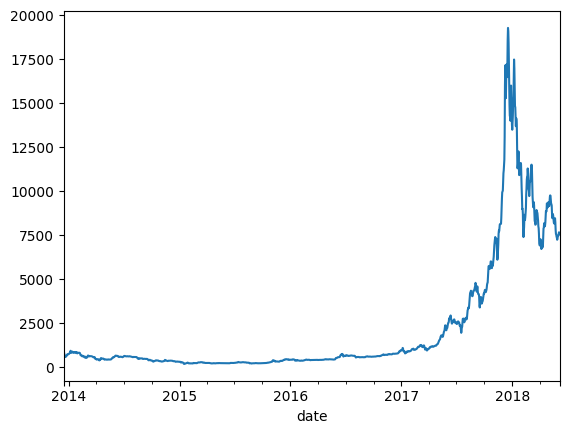

In [ ]:
price.rolling(window=2).mean()['BTC'].plot()

<Axes: xlabel='date'>

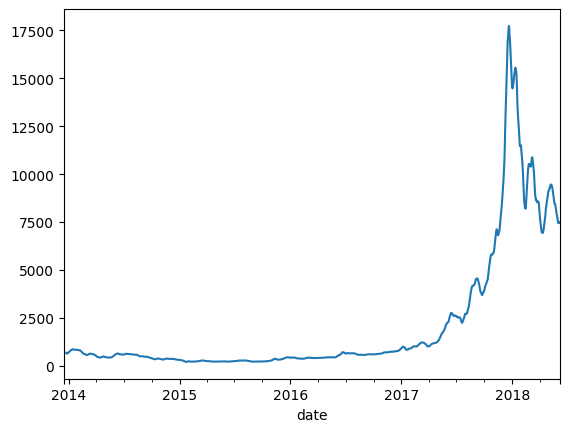

In [ ]:
price.rolling(window=10).mean()['BTC'].plot()

<Axes: xlabel='date'>

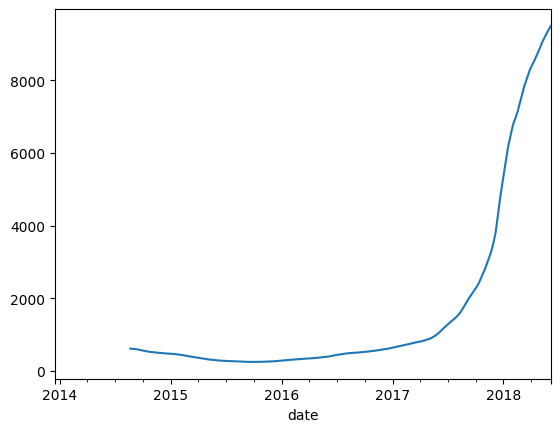

In [ ]:
price.rolling(window=250).mean()['BTC'].plot()

### `ewm`

Недостаток `rolling`:
- нужен размер окна, приходится подбирать
- учитывает объекты **только** в окне - забывает все вне окна

Хотим помнить все прошлые записи, но чем запись дальше, тем меньше на нее обращать внимание.

Давайте обновлять значение рекурсивно:

$$mean[i] = (1-\alpha) \cdot mean[i-1] + \alpha \cdot x[i],$$

где $mean[i-1]$ - вычисленное среднее значение на первых $i-1$ элементах, $\alpha$ - коэффициент забывания (от 0 до 1, чем больше - тем быстрее забываем предыдущие значения). $mean[0]$ можем сделать равным $x[0]$.

Если распишем аналогично $mean[i-1]$:

$$mean[i] = (1-\alpha)\cdot ((1-\alpha) \cdot mean[i-2] + \alpha \cdot x[i-1]) + \alpha\cdot x[i] = (1-\alpha)^2 \cdot mean[i-2] + \alpha(1-\alpha)\cdot x[i-1] + \alpha \cdot x[i]$$

Видим, что $x[i-1]$ вносит вклад меньше, аналогично можем расписать и все остальные $mean$.

Посмотрим как это сделать в `pandas`:

In [ ]:
price

,BTC,DOGE
date,,
2013-12-15,875.29,0.000559
2013-12-16,880.33,0.000299
2013-12-17,706.37,0.000207
2013-12-18,678.20,0.000267
2013-12-19,519.06,0.000395
...,...,...
2018-06-02,7536.72,0.003418
2018-06-03,7632.09,0.003576
2018-06-04,7722.53,0.003691


In [ ]:
price.ewm(alpha=0.1, adjust=False).mean()

,BTC,DOGE
date,,
2013-12-15,875.290000,0.000559
2013-12-16,875.794000,0.000533
2013-12-17,858.851600,0.000500
2013-12-18,840.786440,0.000477
2013-12-19,808.613796,0.000469
...,...,...
2018-06-02,7839.065655,0.003797
2018-06-03,7818.368089,0.003775
2018-06-04,7808.784281,0.003767


Еще один способ получения зависимости - нерекурсивный:

$$
mean^*[t]=x[t] + (1-\alpha) x[t-1] + (1-\alpha)^2 x[t-1] + \cdots + (1-\alpha)^t x[0]$$

Но такая запись будет расти и сильно отклоняться от значений $x[t]$, нужно отнормировать:

$$
mean^*[t]=\frac{x[t] + (1-\alpha) x[t-1] + (1-\alpha)^2 x[t-1] + \cdots + (1-\alpha)^t x[0]}{1 + (1-\alpha) + (1-\alpha)^2 + \cdots + (1-\alpha)^t}$$

Чтобы получить такой вариант, достаточно указать аргумент `adjust=True`:

In [ ]:
price.ewm(alpha=0.1, adjust=True).mean()

,BTC,DOGE
date,,
2013-12-15,875.290000,0.000559
2013-12-16,877.942632,0.000422
2013-12-17,814.631697,0.000343
2013-12-18,774.959788,0.000321
2013-12-19,712.470523,0.000339
...,...,...
2018-06-02,7839.065655,0.003797
2018-06-03,7818.368089,0.003775
2018-06-04,7808.784281,0.003767


Разницу двух подходов лучше всего показать на графике:

<Axes: xlabel='date'>

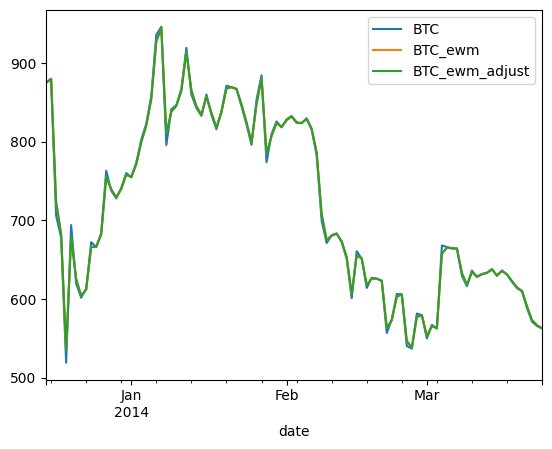

In [ ]:
alpha = 0.9
size = 100
column = 'BTC'

price_part = price.iloc[:size]

pd.DataFrame(
    {
        f"{column}": price_part[column],
        f"{column}_ewm": price_part[column].ewm(alpha=alpha, adjust=False).mean(),
        f"{column}_ewm_adjust": price_part[column].ewm(alpha=alpha, adjust=True).mean(),
    }
).plot()

## Работа с группами

Иногда хочется разбить данные по группам и посчитать статистики / преобразовать / пофильтровать. Для этого есть метод **groupby**. Он возвращает специальный объект для работы со сгруппированными данными.

In [ ]:
operations = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 5000, 0.2],
        ['BTC', 'buy', 10, 6000],
        ['BTC', 'buy', 2.5, 5900],
        ['DOGE', 'sell', 3000, 0.1],
        ['BTC', 'sell', 4, 6200],
        ['ETH', 'sell', 10, 400],
        ['BTC', 'buy', 1, 5600],
        ['ETH', 'buy', 20, 350],
        ['ETH', 'sell', 10, 300],
        ['DOGE', 'sell', 3000, 0.15]
    ],
    columns=['symbol', 'type', 'amount', 'price'],
    index=pd.date_range('2018-01-01', periods=10)
)
operations

,symbol,type,amount,price
2018-01-01,DOGE,buy,5000.0,0.20
2018-01-02,BTC,buy,10.0,6000.00
2018-01-03,BTC,buy,2.5,5900.00
2018-01-04,DOGE,sell,3000.0,0.10
2018-01-05,BTC,sell,4.0,6200.00
2018-01-06,ETH,sell,10.0,400.00
2018-01-07,BTC,buy,1.0,5600.00
2018-01-08,ETH,buy,20.0,350.00
2018-01-09,ETH,sell,10.0,300.00
2018-01-10,DOGE,sell,3000.0,0.15


Сгруппируем операции по типу монет:

In [ ]:
link = operations.groupby('symbol')

In [ ]:
link

Получили целый набор датафреймов. Посмотрим на них:

In [ ]:
# Посмотреть на содержимое каждой группы
for name, group in link:
    print(name)
    print(group)

BTC
           symbol  type  amount   price
2018-01-02    BTC   buy    10.0  6000.0
2018-01-03    BTC   buy     2.5  5900.0
2018-01-05    BTC  sell     4.0  6200.0
2018-01-07    BTC   buy     1.0  5600.0
DOGE
           symbol  type  amount  price
2018-01-01   DOGE   buy  5000.0   0.20
2018-01-04   DOGE  sell  3000.0   0.10
2018-01-10   DOGE  sell  3000.0   0.15
ETH
           symbol  type  amount  price
2018-01-06    ETH  sell    10.0  400.0
2018-01-08    ETH   buy    20.0  350.0
2018-01-09    ETH  sell    10.0  300.0


Как понять какие объекты попали в эту группу? Получим их индексы:

In [ ]:
link.groups[('BTC')]

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-05', '2018-01-07'], dtype='datetime64[ns]', freq=None)

Чтобы получить желаемую группу, есть метод `get_group`:

In [ ]:
link.get_group('BTC')

,symbol,type,amount,price
2018-01-02,BTC,buy,10.0,6000.0
2018-01-03,BTC,buy,2.5,5900.0
2018-01-05,BTC,sell,4.0,6200.0
2018-01-07,BTC,buy,1.0,5600.0


Аналогично можно группировать и по нескольким полям, например, сгруппируем операции по типу монеты и типу операции:

In [ ]:
operations.groupby(['symbol', 'type'])

In [ ]:
operations.groupby(['symbol', 'type']).groups[('BTC', 'buy')]

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-07'], dtype='datetime64[ns]', freq=None)

In [ ]:
for name, group in operations.groupby(['symbol', 'type']):
    print(name)
    print(group)

('BTC', 'buy')
           symbol type  amount   price
2018-01-02    BTC  buy    10.0  6000.0
2018-01-03    BTC  buy     2.5  5900.0
2018-01-07    BTC  buy     1.0  5600.0
('BTC', 'sell')
           symbol  type  amount   price
2018-01-05    BTC  sell     4.0  6200.0
('DOGE', 'buy')
           symbol type  amount  price
2018-01-01   DOGE  buy  5000.0    0.2
('DOGE', 'sell')
           symbol  type  amount  price
2018-01-04   DOGE  sell  3000.0   0.10
2018-01-10   DOGE  sell  3000.0   0.15
('ETH', 'buy')
           symbol type  amount  price
2018-01-08    ETH  buy    20.0  350.0
('ETH', 'sell')
           symbol  type  amount  price
2018-01-06    ETH  sell    10.0  400.0
2018-01-09    ETH  sell    10.0  300.0


In [ ]:
operations.groupby(['symbol', 'type']).get_group(('BTC', 'buy'))

,symbol,type,amount,price
2018-01-02,BTC,buy,10.0,6000.0
2018-01-03,BTC,buy,2.5,5900.0
2018-01-07,BTC,buy,1.0,5600.0


Теперь посмотрим как агрегировать данные для каждой группы. Найти обороты для каждой монеты и операции:

In [ ]:
grouper = operations.groupby(['symbol', 'type'])
#grouper['amount'].agg('mean')
grouper['amount'].mean()

symbol  type
BTC     buy        4.5
        sell       4.0
DOGE    buy     5000.0
        sell    3000.0
ETH     buy       20.0
        sell      10.0
Name: amount, dtype: float64

Найти обороты и самые крупные сделки для каждой монеты и операции:

In [ ]:
grouper = operations.groupby(['symbol', 'type'])
grouper['amount'].agg([sum, max])

Найти обороты и среднюю цену для каждой монеты и операции

In [ ]:
grouper = operations.groupby(['symbol', 'type'])
grouper.agg({'amount': sum, 'price': ['mean', 'median']})

amount        price          
                sum         mean    median
symbol type                               
BTC    buy     13.5  5833.333333  5900.000
       sell     4.0  6200.000000  6200.000
DOGE   buy   5000.0     0.200000     0.200
       sell  6000.0     0.125000     0.125
ETH    buy     20.0   350.000000   350.000
       sell    20.0   350.000000   350.000

In [ ]:
# Получить размер группы в которой сидит запись
operations.groupby(['symbol', 'type']).apply(lambda series: series.shape[0])

symbol  type
BTC     buy     3
        sell    1
DOGE    buy     1
        sell    2
ETH     buy     1
        sell    2
dtype: int64

In [ ]:
#Вывести группы по убыванию числа уникальных значений в колонке amount
operations.groupby(['symbol', 'type'])['amount'].nunique()

symbol  type
BTC     buy     3
        sell    1
DOGE    buy     1
        sell    1
ETH     buy     1
        sell    1
Name: amount, dtype: int64

In [ ]:
operations

,symbol,type,amount,price
2018-01-01,DOGE,buy,5000.0,0.20
2018-01-02,BTC,buy,10.0,6000.00
2018-01-03,BTC,buy,2.5,5900.00
2018-01-04,DOGE,sell,3000.0,0.10
2018-01-05,BTC,sell,4.0,6200.00
2018-01-06,ETH,sell,10.0,400.00
2018-01-07,BTC,buy,1.0,5600.00
2018-01-08,ETH,buy,20.0,350.00
2018-01-09,ETH,sell,10.0,300.00
2018-01-10,DOGE,sell,3000.0,0.15


Сгруппированные данные можно фильтровать. Вы можете решить какие группы оставить с помощью вашей функции. Она на вход принимает pandas.DataFrame и возвращает bool

In [ ]:
help(operations.groupby(['symbol', 'type']).filter)

Help on method filter in module pandas.core.groupby.generic:

filter(func, dropna=True, *args, **kwargs) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Return a copy of a DataFrame excluding filtered elements.
    
    Elements from groups are filtered if they do not satisfy the
    boolean criterion specified by func.
    
    Parameters
    ----------
    func : function
        Function to apply to each subframe. Should return True or False.
    dropna : Drop groups that do not pass the filter. True by default;
        If False, groups that evaluate False are filled with NaNs.
    
    Returns
    -------
    filtered : DataFrame
    
    Notes
    -----
    Each subframe is endowed the attribute 'name' in case you need to know
    which group you are working on.
    
    Functions that mutate the passed object can produce unexpected
    behavior or errors and are not supported. See :ref:`gotchas.udf-mutation`
    for more details.
    
    Examples
    --------

### `filter`

До этого мы умели выбирать элементы по условию, которое проверяет значения в столбцах для каждой строчки. Пора ввести "групповую ответственность":

In [ ]:
# Выбрать монеты и операции для которых оборот был больше 20 монет
operations.groupby(['symbol', 'type']).filter(lambda table: table['price'].mean() >= 100)

,symbol,type,amount,price
2018-01-02,BTC,buy,10.0,6000.0
2018-01-03,BTC,buy,2.5,5900.0
2018-01-05,BTC,sell,4.0,6200.0
2018-01-06,ETH,sell,10.0,400.0
2018-01-07,BTC,buy,1.0,5600.0
2018-01-08,ETH,buy,20.0,350.0
2018-01-09,ETH,sell,10.0,300.0


## Сводные таблицы

Большинство таблиц в сыром виде похожи на логи где каждая строка это запись. Никакой оргинизации в данных в этих таблицах нет, а хотелось бы. Для этого в pandas существуют сводные таблицы.

In [ ]:
operations = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 5000, 0.2, 'Joe Doe', 'success'],
        ['BTC', 'buy', 10, 6000, 'Elon Musk', 'error'],
        ['BTC', 'buy', 2.5, 5900, 'George Bush', 'success'],
        ['DOGE', 'sell', 3000, 0.1, 'John Romero', 'success'],
        ['BTC', 'sell', 4, 6200, 'Jack Ma', 'success'],
        ['ETH', 'sell', 10, 400, 'Satoshi Nakomoto', 'error'],
        ['BTC', 'buy', 1, 5600, 'Vladimir Vladimirovich', 'success'],
        ['ETH', 'buy', 20, 350, 'George Bush', 'success'],
        ['ETH', 'sell', 10, 300, 'Jack Ma', 'error'],
        ['DOGE', 'sell', 3000, 0.15, 'Joe Doe', 'success']
    ],
    columns=['symbol', 'type', 'amount', 'price', 'user', 'status'],
    index=pd.date_range('2018-01-01', periods=10)
)
operations

,symbol,type,amount,price,user,status
2018-01-01,DOGE,buy,5000.0,0.20,Joe Doe,success
2018-01-02,BTC,buy,10.0,6000.00,Elon Musk,error
2018-01-03,BTC,buy,2.5,5900.00,George Bush,success
2018-01-04,DOGE,sell,3000.0,0.10,John Romero,success
2018-01-05,BTC,sell,4.0,6200.00,Jack Ma,success
2018-01-06,ETH,sell,10.0,400.00,Satoshi Nakomoto,error
2018-01-07,BTC,buy,1.0,5600.00,Vladimir Vladimirovich,success
2018-01-08,ETH,buy,20.0,350.00,George Bush,success
2018-01-09,ETH,sell,10.0,300.00,Jack Ma,error
2018-01-10,DOGE,sell,3000.0,0.15,Joe Doe,success


Лучше всего понять как они работают это разобрать пример. Найдем сколько суммарно  было куплено и продано каждого типа монет. В результирующей сводной таблице индексом будет название монеты, колонки - типы транзакций (т.е. покупки или продажи). В самих ячейках будет суммарное количество монет.

In [ ]:
operations.pivot_table(
    values='amount',
    index='symbol',
    columns='type',
    aggfunc='sum'
)

type,buy,sell
symbol,,
BTC,13.5,4.0
DOGE,5000.0,6000.0
ETH,20.0,20.0


Если не указывать явно аргумент aggfunc, то агрегация будет через усреднение (а не через суммирование как было в нашем примере). Расмотрим более сложный пример.

In [ ]:
operations.pivot_table(
    values='amount',
    index=['symbol', 'user'],  # Индекс может быть иерархическим и строиться по нескольким колонкам
    columns=['type', 'status'],  # Аналогично иерархическими могут быть и колонки
    aggfunc=['sum', 'mean']  # Можно вычислять сразу несколько агрегаций
)

sum                        mean                \
type                            buy          sell           buy          sell   
status                        error success error success error success error   
symbol user                                                                     
BTC    Elon Musk               10.0     NaN   NaN     NaN  10.0     NaN   NaN   
       George Bush              NaN     2.5   NaN     NaN   NaN     2.5   NaN   
       Jack Ma                  NaN     NaN   NaN     4.0   NaN     NaN   NaN   
       Vladimir Vladimirovich   NaN     1.0   NaN     NaN   NaN     1.0   NaN   
DOGE   Joe Doe                  NaN  5000.0   NaN  3000.0   NaN  5000.0   NaN   
       John Romero              NaN     NaN   NaN  3000.0   NaN     NaN   NaN   
ETH    George Bush              NaN    20.0   NaN     NaN   NaN    20.0   NaN   
       Jack Ma                  NaN     NaN  10.0     NaN   NaN     NaN  10.0   
       Satoshi Nakomoto         NaN     NaN  10.0     NaN   NaN     NaN  10.0   

                                       
type                                   
status                        success  
symbol user                            
BTC    Elon Musk                  NaN  
       George Bush                NaN  
       Jack Ma                    4.0  
       Vladimir Vladimirovich     NaN  
DOGE   Joe Doe                 3000.0  
       John Romero             3000.0  
ETH    George Bush                NaN  
       Jack Ma                    NaN  
       Satoshi Nakomoto           NaN

И самый монструозный пример, где мы сделаем сводную таблиц для цен и объемов торгов.

In [ ]:
operations.pivot_table(
    values=['amount', 'price'],  # Можно находить статистику по разным числовым показателям
    index=['symbol', 'user'],
    columns=['type', 'status'],
    aggfunc={
        'amount': ['sum', 'mean'],
        'price': 'max'}  # Тогда для каждого показателя надо указать какие агрегации вы хотите
)

amount                                      \
                                mean                         sum           
type                             buy          sell           buy           
status                         error success error success error success   
symbol user                                                                
BTC    Elon Musk                10.0     NaN   NaN     NaN  10.0     NaN   
       George Bush               NaN     2.5   NaN     NaN   NaN     2.5   
       Jack Ma                   NaN     NaN   NaN     4.0   NaN     NaN   
       Vladimir Vladimirovich    NaN     1.0   NaN     NaN   NaN     1.0   
DOGE   Joe Doe                   NaN  5000.0   NaN  3000.0   NaN  5000.0   
       John Romero               NaN     NaN   NaN  3000.0   NaN     NaN   
ETH    George Bush               NaN    20.0   NaN     NaN   NaN    20.0   
       Jack Ma                   NaN     NaN  10.0     NaN   NaN     NaN   
       Satoshi Nakomoto          NaN     NaN  10.0     NaN   NaN     NaN   

                                              price                          
                                                max                          
type                           sell             buy           sell           
status                        error success   error success  error  success  
symbol user                                                                  
BTC    Elon Musk                NaN     NaN  6000.0     NaN    NaN      NaN  
       George Bush              NaN     NaN     NaN  5900.0    NaN      NaN  
       Jack Ma                  NaN     4.0     NaN     NaN    NaN  6200.00  
       Vladimir Vladimirovich   NaN     NaN     NaN  5600.0    NaN      NaN  
DOGE   Joe Doe                  NaN  3000.0     NaN     0.2    NaN     0.15  
       John Romero              NaN  3000.0     NaN     NaN    NaN     0.10  
ETH    George Bush              NaN     NaN     NaN   350.0    NaN      NaN  
       Jack Ma                 10.0     NaN     NaN     NaN  300.0      NaN  
       Satoshi Nakomoto        10.0     NaN     NaN     NaN  400.0      NaN

In [ ]:
operations.pivot_table?

Для построения сводных таблиц в pandas есть более простая функция. pandas.pivot. Она не делает никаких агрегаций, поэтому при ее использовании вы должны быть уверены, что на каждую ячейку результирующей сводной таблицы придется только одно значение показателя из исходной таблицы. В противном случае будет ошибка. Можете попробовать построить сводную таблицу
```
operations.pivot(values='amount', index='user', columns='user')
```
чтобы убедиться.

**Задание:** Самостоятельно разберитесь с функциями pandas.stack, pandas.unstack и pandas.melt. Вам поможет [этот tutorial](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)

# EXTRA Пропуски и ошибки в данных

В реальной жизни данные с которыми надо работать содержат пропуски или просто неверные значения. Мы обсудим как это можно исправить

In [ ]:
price = pd.DataFrame(
    data=[
        [0.547, 0.745],
        [-2, -1],
        [None, 0.718],
        [0.135, 0.845],
        [0.53, None],
        [None, -1]],
    columns=['ADA', 'DOGE'],
    # Создаем специальный индекс из 6 дней начиная с 2018-11-01
    index=pd.date_range('2018-11-01', periods=6)
)
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [ ]:
# Найти места где есть пропуски методом isnull. Аналогично есть метод notnull
price.isnull()

,ADA,DOGE
2018-11-01,False,False
2018-11-02,False,False
2018-11-03,True,False
2018-11-04,False,False
2018-11-05,False,True
2018-11-06,True,False


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2018-11-01 to 2018-11-06
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADA     4 non-null      float64
 1   DOGE    5 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes


In [ ]:
# Заполнить все пропуски дефолтным занчением
price.fillna(0)

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,0.000,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,0.000
2018-11-06,0.000,-1.000


In [ ]:
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [ ]:
# Заполнить все пропуски занчениями со cледующей строки
price.fillna(method='bfill')

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,0.135,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,-1.000
2018-11-06,NaN,-1.000


In [ ]:
# Заполнить все пропуски занчениями с предыдущей строки
price.fillna(method='ffill')

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,-2.000,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,0.845
2018-11-06,0.530,-1.000


In [ ]:
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit: 'int | None' = None, downcast: 'dict | None' = None) -> 'DataFrame | None'
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to f

In [ ]:
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [ ]:
#  Выкинуть строки содержащие nan'ы
price.dropna()

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-04,0.135,0.845


In [ ]:
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset=None, inplace: 'bool' = False)
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, drop that row

In [ ]:
#  Выкинуть колонки содержащие nan'ы
price.dropna(axis=1).empty

True

In [ ]:
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [ ]:
# Подменить значения
price.replace({-1: 0, -2: 0})

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,0.000,0.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,0.000


In [ ]:
help(pd.DataFrame.replace)

In [ ]:
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,-2.000,-1.000
2018-11-03,NaN,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,NaN,-1.000


In [ ]:
del price

# EXTRA Слияния и конкатенации таблиц

Если у вас есть две таблицы, то информацию в них можно объединить двумя способами: конкатенация ("прилепить снизу новую таблицу") и объединение (найти объединение записей таблиц если у них хранятся одни и те же значения в выбранных колонках).

In [ ]:
operations_old = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 5000, 0.2],
        ['BTC', 'buy', 10, 6000],
        ['BTC', 'buy', 2.5, 5900],
        ['DOGE', 'sell', 3000, 0.1],
        ['BTC', 'sell', 4, 6200],
    ],
    columns=['symbol', 'type', 'amount', 'price']
)
operations_old


,symbol,type,amount,price
0,DOGE,buy,5000.0,0.2
1,BTC,buy,10.0,6000.0
2,BTC,buy,2.5,5900.0
3,DOGE,sell,3000.0,0.1
4,BTC,sell,4.0,6200.0


In [ ]:
operations_new = pd.DataFrame(
    data=[
        ['ETH', 'sell', 10, 400],
        ['BTC', 'buy', 1, 5600],
        ['ETH', 'buy', 20, 350],
        ['ETH', 'sell', 10, 300],
        ['DOGE', 'sell', 3000, 0.15]
    ],
    columns=['symbol', 'type', 'amount', 'price']
)
operations_new

,symbol,type,amount,price
0,ETH,sell,10,400.00
1,BTC,buy,1,5600.00
2,ETH,buy,20,350.00
3,ETH,sell,10,300.00
4,DOGE,sell,3000,0.15


In [ ]:
#  Сконкатенировать таблицы в указанном порядке
new_df = pd.concat([operations_old, operations_new])
new_df

,symbol,type,amount,price
0,DOGE,buy,5000.0,0.20
1,BTC,buy,10.0,6000.00
2,BTC,buy,2.5,5900.00
3,DOGE,sell,3000.0,0.10
4,BTC,sell,4.0,6200.00
0,ETH,sell,10.0,400.00
1,BTC,buy,1.0,5600.00
2,ETH,buy,20.0,350.00
3,ETH,sell,10.0,300.00
4,DOGE,sell,3000.0,0.15


In [ ]:
new_df.loc[1]

,symbol,type,amount,price
1,BTC,buy,10.0,6000.0
1,BTC,buy,1.0,5600.0


In [ ]:
new_df.reset_index()

,index,symbol,type,amount,price
0,0,DOGE,buy,5000.0,0.20
1,1,BTC,buy,10.0,6000.00
2,2,BTC,buy,2.5,5900.00
3,3,DOGE,sell,3000.0,0.10
4,4,BTC,sell,4.0,6200.00
5,0,ETH,sell,10.0,400.00
6,1,BTC,buy,1.0,5600.00
7,2,ETH,buy,20.0,350.00
8,3,ETH,sell,10.0,300.00
9,4,DOGE,sell,3000.0,0.15


In [ ]:
new_df.reset_index().drop(columns='index')

,symbol,type,amount,price
0,DOGE,buy,5000.0,0.20
1,BTC,buy,10.0,6000.00
2,BTC,buy,2.5,5900.00
3,DOGE,sell,3000.0,0.10
4,BTC,sell,4.0,6200.00
5,ETH,sell,10.0,400.00
6,BTC,buy,1.0,5600.00
7,ETH,buy,20.0,350.00
8,ETH,sell,10.0,300.00
9,DOGE,sell,3000.0,0.15


In [ ]:
new_df.drop?

In [ ]:
# При конкатенации таблицам можно назначать теги чтобы понимать, где какая таблица
pd.concat([operations_old, operations_new], keys=['old', 'new'])


symbol  type  amount    price
old 0   DOGE   buy  5000.0     0.20
    1    BTC   buy    10.0  6000.00
    2    BTC   buy     2.5  5900.00
    3   DOGE  sell  3000.0     0.10
    4    BTC  sell     4.0  6200.00
new 0    ETH  sell    10.0   400.00
    1    BTC   buy     1.0  5600.00
    2    ETH   buy    20.0   350.00
    3    ETH  sell    10.0   300.00
    4   DOGE  sell  3000.0     0.15

In [ ]:
# Как видно при конкатенации индексы старых таблиц копируются.
# Если вам не нужно это поведение, используйте ignore_index
operations = pd.concat([operations_new, operations_old], ignore_index=True)
operations

,symbol,type,amount,price
0,ETH,sell,10.0,400.00
1,BTC,buy,1.0,5600.00
2,ETH,buy,20.0,350.00
3,ETH,sell,10.0,300.00
4,DOGE,sell,3000.0,0.15
5,DOGE,buy,5000.0,0.20
6,BTC,buy,10.0,6000.00
7,BTC,buy,2.5,5900.00
8,DOGE,sell,3000.0,0.10
9,BTC,sell,4.0,6200.00


In [ ]:
operations_old = pd.DataFrame(
    data=[
        ['DOGE', 'buy', 0.2],
        ['BTC', 'buy', 6000],
        ['BTC', 'buy', 5900],
        ['DOGE', 'sell', 0.1],
        ['BTC', 'sell', 200],
    ],
    columns=['symbol', 'type', 'price']
)
operations_new = pd.DataFrame(
    data=[
        ['ETH', 'sell', 10],
        ['BTC', 'buy', 1],
        ['ETH', 'buy', 20],
        ['ETH', 'sell', 10],
        ['DOGE', 'sell', 3000]
    ],
    columns=['symbol', 'type', 'amount']
)

In [ ]:
operations = pd.concat([operations_new, operations_old], ignore_index=True)
operations

,symbol,type,amount,price
0,ETH,sell,10.0,NaN
1,BTC,buy,1.0,NaN
2,ETH,buy,20.0,NaN
3,ETH,sell,10.0,NaN
4,DOGE,sell,3000.0,NaN
5,DOGE,buy,NaN,0.2
6,BTC,buy,NaN,6000.0
7,BTC,buy,NaN,5900.0
8,DOGE,sell,NaN,0.1
9,BTC,sell,NaN,200.0


Данные можно собирать вместе и более умным способом. А именно, вы выбираете какие колонки вас интересуют. Далее если есть записи из двух таблиц у котороых в выбранных колонках значения совпадают мы их "объединяем". Это очень упрощенное объяснение. В pandas эта операция называется merge в SQL - join. Делать объединение можно разными сопособами, поэтому возникает несколько стратегий: left, right, inner и full.

In [ ]:
transactions = pd.DataFrame(
    data=[
        ['DOGE', 'sell', 'Rockfeller'],
        ['DOGE', 'buy', 'J.P. Morgan'],
        ['BTC', 'buy', 'John Doe'],
        ['ADA', 'sell', 'Rick'],
        ['ETH', 'buy', 'Morty']
    ],
    columns=['symbol', 'type', 'user']
)
transactions

,symbol,type,user
0,DOGE,sell,Rockfeller
1,DOGE,buy,J.P. Morgan
2,BTC,buy,John Doe
3,ADA,sell,Rick
4,ETH,buy,Morty


In [ ]:
operations

,symbol,type,amount,price
0,ETH,sell,10.0,400.00
1,BTC,buy,1.0,5600.00
2,ETH,buy,20.0,350.00
3,ETH,sell,10.0,300.00
4,DOGE,sell,3000.0,0.15
5,DOGE,buy,5000.0,0.20
6,BTC,buy,10.0,6000.00
7,BTC,buy,2.5,5900.00
8,DOGE,sell,3000.0,0.10
9,BTC,sell,4.0,6200.00


In [ ]:
# Объединение таблиц по типу монеты и операции
# По умолчанию производится inner join остаются записи в которых были полные совпадения
pd.merge(operations, transactions, on=['symbol', 'type'])

,symbol,type,amount,price,user
0,BTC,buy,1.0,5600.00,John Doe
1,BTC,buy,10.0,6000.00,John Doe
2,BTC,buy,2.5,5900.00,John Doe
3,ETH,buy,20.0,350.00,Morty
4,DOGE,sell,3000.0,0.15,Rockfeller
5,DOGE,sell,3000.0,0.10,Rockfeller
6,DOGE,buy,5000.0,0.20,J.P. Morgan


In [ ]:
pd.merge(transactions, operations, on=['symbol', 'type'])

,symbol,type,user,amount,price
0,DOGE,sell,Rockfeller,3000.0,NaN
1,DOGE,sell,Rockfeller,NaN,0.1
2,DOGE,buy,J.P. Morgan,NaN,0.2
3,BTC,buy,John Doe,1.0,NaN
4,BTC,buy,John Doe,NaN,6000.0
5,BTC,buy,John Doe,NaN,5900.0
6,ETH,buy,Morty,20.0,NaN


In [ ]:
# Левый join таблиц - все записи из первой таблицы остаются и к ним присоединяются записи из правой.
# Аналогично работает правый join
pd.merge(operations, transactions, on=['symbol', 'type'], how='left')

,symbol,type,amount,price,user
0,ETH,sell,10.0,400.00,NaN
1,BTC,buy,1.0,5600.00,John Doe
2,ETH,buy,20.0,350.00,Morty
3,ETH,sell,10.0,300.00,NaN
4,DOGE,sell,3000.0,0.15,Rockfeller
5,DOGE,buy,5000.0,0.20,J.P. Morgan
6,BTC,buy,10.0,6000.00,John Doe
7,BTC,buy,2.5,5900.00,John Doe
8,DOGE,sell,3000.0,0.10,Rockfeller
9,BTC,sell,4.0,6200.00,NaN


In [ ]:
# Outer join - собираем вместе записи из обеих таблиц
pd.merge(operations, transactions, on=['symbol', 'type'], how='outer')

,symbol,type,amount,price,user
0,ETH,sell,10.0,400.00,NaN
1,ETH,sell,10.0,300.00,NaN
2,BTC,buy,1.0,5600.00,John Doe
3,BTC,buy,10.0,6000.00,John Doe
4,BTC,buy,2.5,5900.00,John Doe
5,ETH,buy,20.0,350.00,Morty
6,DOGE,sell,3000.0,0.15,Rockfeller
7,DOGE,sell,3000.0,0.10,Rockfeller
8,DOGE,buy,5000.0,0.20,J.P. Morgan
9,BTC,sell,4.0,6200.00,NaN


In [ ]:
pd.merge?

In [ ]:
pd.DataFrame.join?

In [ ]:
del operations_new, operations_old, operations, transactions

In [ ]:
a @ b

In [ ]:
np.dot(a, b) # pd.merge(a, b)

In [ ]:
a.dot(b) # a.join(b)

# EXTRA. Чтение таблиц

Чтобы данные анализировать их надо где-то взять. Для этого в pandas есть множество функций. Все их названия начинаются с префикса 'read_'. Мы разберем функцию read_csv.

In [ ]:
# Прочитать таблицу ни о чем не задумываясь
pd.read_csv('coins.csv')

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


In [ ]:
# Прочитать таблицу и использовать колонку date как индекс
pd.read_csv('coins.csv', index_col='date')

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


In [ ]:
# Прочитать таблицу и дать pandas подсказки по поводу типов данных в колонках symbol и name
df = pd.read_csv('coins.csv', dtype={'symbol': str, 'name': str, "open": str})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37588 entries, 0 to 37587
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             37588 non-null  object 
 1   price            37261 non-null  float64
 2   txCount          36068 non-null  float64
 3   txVolume         35758 non-null  float64
 4   activeAddresses  36068 non-null  float64
 5   symbol           37588 non-null  object 
 6   name             37588 non-null  object 
 7   open             37588 non-null  object 
 8   high             37588 non-null  float64
 9   low              37588 non-null  float64
 10  close            37588 non-null  float64
 11  volume           37588 non-null  float64
 12  market           37588 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.7+ MB


## Запись таблиц

In [ ]:
coins = pd.read_csv('coins.csv')

coins.to_csv('file.csv')

In [ ]:
pd.read_csv?

In [ ]:
pd.DataFrame.to_csv?

# EXTRA. Встроенная визуализация

В pandas есть очень простые средства визуализации. Они подойдут для быстрого анализа, но если хочется сделать красиво и информативно, то вы не по адресу. Любая визуализация делается через аттрибут plot у объекта pandas.Series или pandas.DataFrame.

In [ ]:
price = pd.DataFrame(
    data=[
        [0.547, 0.745],
        [0.5, 0.964],
        [0.77, 0.718],
        [0.135, 0.845],
        [0.53, None],
        [0.15, 0.795]],
    columns=['ADA', 'DOGE'],
    index=pd.date_range('2018-11-01', periods=6)
)
price

,ADA,DOGE
2018-11-01,0.547,0.745
2018-11-02,0.500,0.964
2018-11-03,0.770,0.718
2018-11-04,0.135,0.845
2018-11-05,0.530,NaN
2018-11-06,0.150,0.795


In [ ]:
coins.groupby('symbol').get_group('BTC').price

date
2013-04-28     135.30
2013-04-29     134.44
2013-04-30     144.00
2013-05-01     139.00
2013-05-02     116.38
               ...   
2018-06-02    7536.72
2018-06-03    7632.09
2018-06-04    7722.53
2018-06-05    7500.90
2018-06-06    7625.97
Name: price, Length: 1866, dtype: float64

<Axes: xlabel='date'>

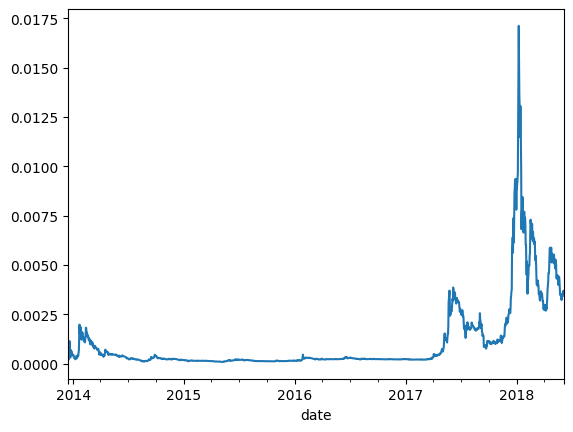

In [ ]:
coins.groupby('symbol').get_group('DOGE').price.plot()

<Axes: xlabel='date'>

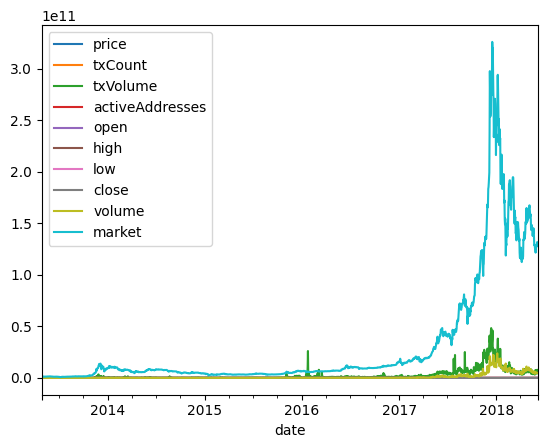

In [ ]:
# Нарисовать график цены монеты ADA.
# Так как индекс в нашей таблице временный, то pandas догадывается, что его можно использовать
# как ось времени на графиках.
coins[coins['symbol'] == 'BTC'].plot()

<Axes: >

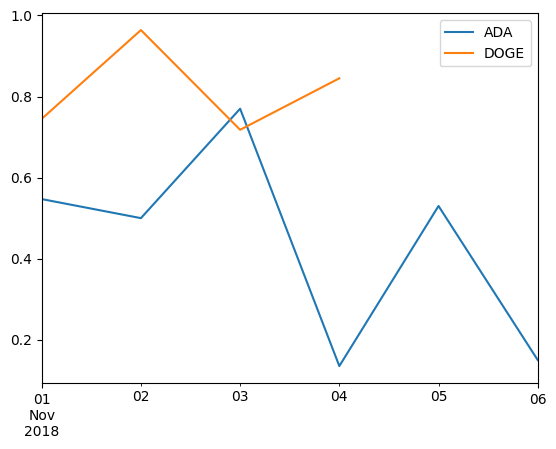

In [ ]:
# Можно на одном графике нарисовать поведение цены сразу нескольких монет
price[['ADA', 'DOGE']].plot()

<Axes: >

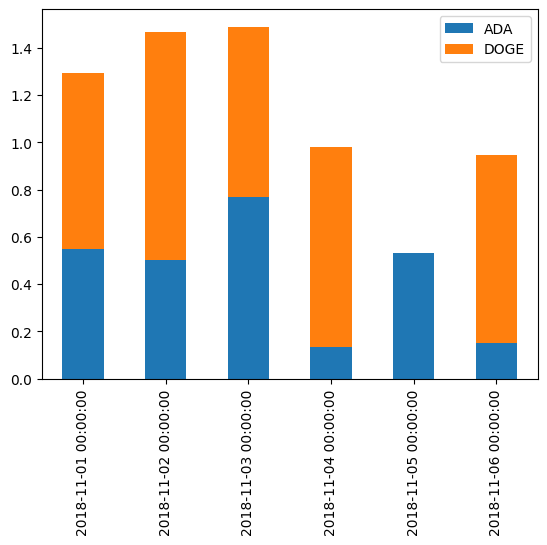

In [ ]:
# Цену можно рисовать и в виде столбцовой диаграммы c различными настройками
price.plot.bar(stacked=True)

<Axes: >

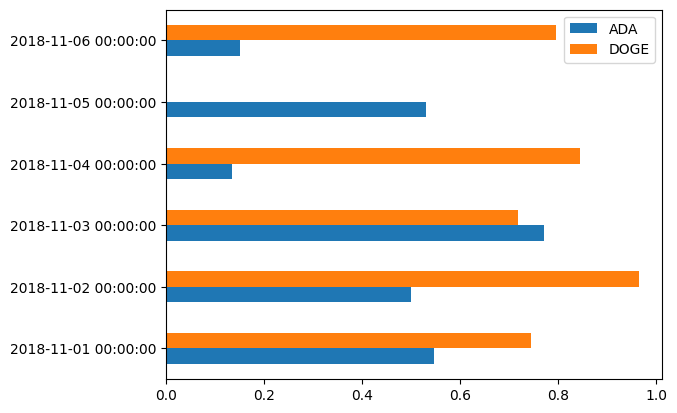

In [ ]:
# Горизонтальная столбцовая диаграмма
price.plot.barh()

<Axes: ylabel='Frequency'>

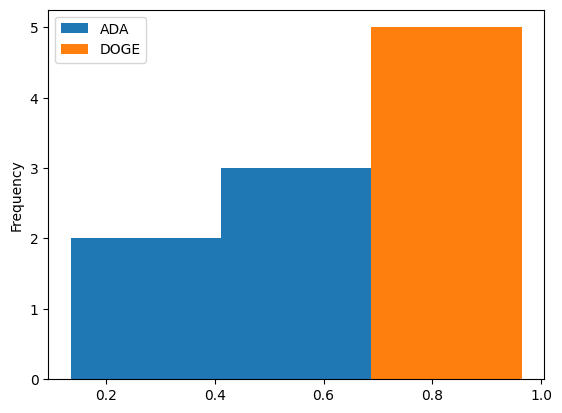

In [ ]:
# Гистограмма
price.plot.hist(bins=3)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


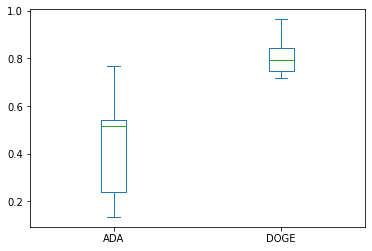

In [ ]:
# Ящики с усами
price.plot.box()

<Axes: >

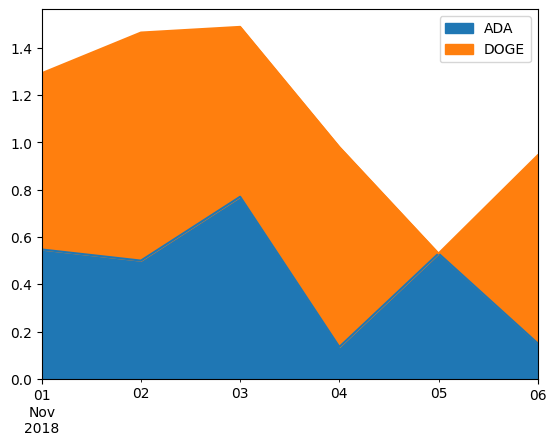

In [ ]:
# Графики с заливкой
price.plot.area()

<Axes: xlabel='ADA', ylabel='DOGE'>

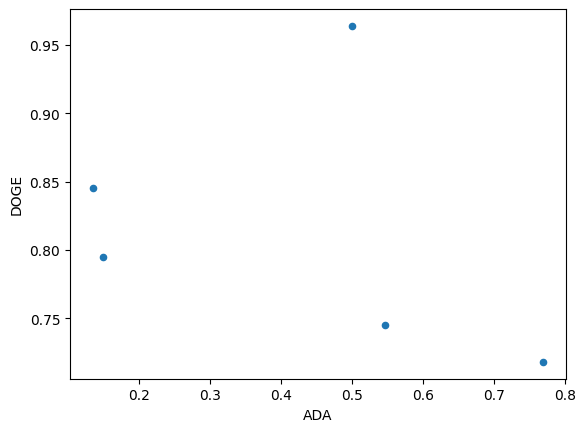

In [ ]:
# Если хочется нарисовать пары каких либо значений в виде точек на плоскости, то подойдет scatter plot
price.plot.scatter(x='ADA', y='DOGE')

array([<Axes: ylabel='ADA'>, <Axes: ylabel='DOGE'>], dtype=object)

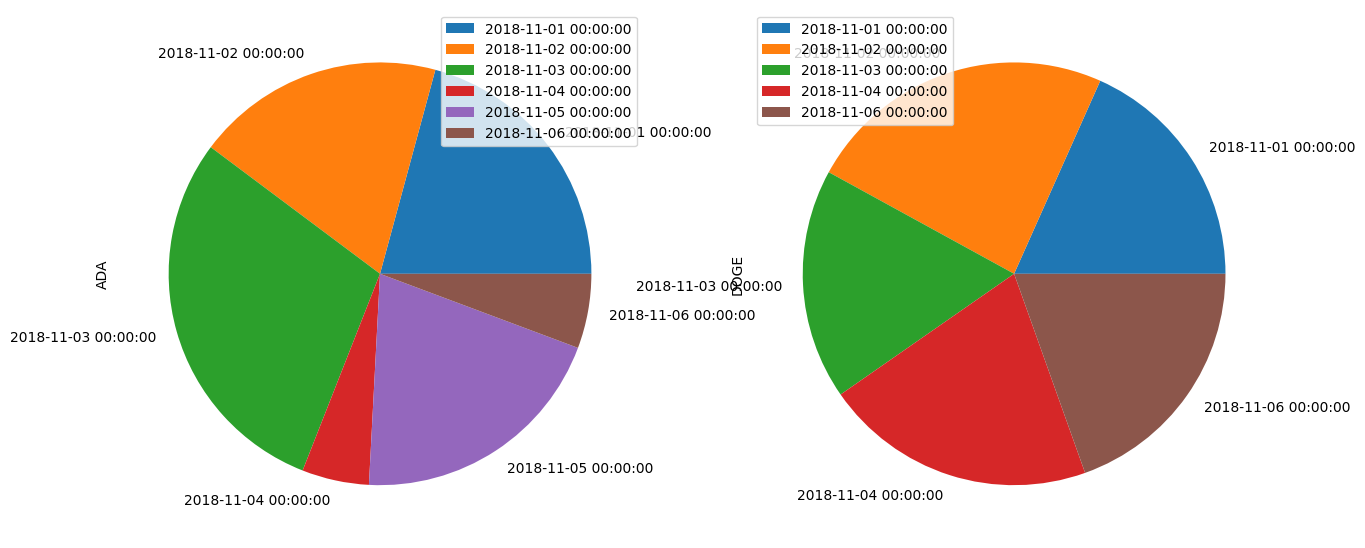

In [ ]:
# И на десерт - пирожковая диаграмма
price.plot.pie(subplots=True, figsize=(15,7.5))